# Analyzing Sales Data with Python

This analysis is carried out on a random sales dataset. The objective of this data is to figure out how the organizations sales team is perfoming, what products to put more marketing budget behind, and what products to discontinue. 

The analysis should answer the following questions

1. How has sales performed overtime
2. What are the top and bottom 10 selling products by revenue
3. What are the top and bottom selling products by quantity 
4. What shipping method is the most preferred
5. What are the most profitable categories and sub-categories

In [1]:
#Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import excel sheet
df = pd.read_excel('superstore_sales.xlsx')

# Data Audit

In this section, I audit the data set as a whole.

Steps: I check if the data isn't broken during import. If it is exactly as it looks in the excel sheet by checking the head and the tail of the data. 

I also check for the shape of the dataset, all of the columns included in the datset, and I checked for a consice summary of the dataset using the pandas info() function.

Latly, I check for duplicates, and missing values within the dataset.

In [3]:
# First five rows of the dataset

df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
# Last five rows of the dataset

df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [5]:
# Shape of the dataset

df.shape

(51290, 21)

In [6]:
# Columns present in the dataset

df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [7]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
# Checking missing values, Zeros mean there are none
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [9]:
# Checking missing values, zeros mean there are none.
df.duplicated().sum()

0

In [10]:
# Generating descriptive statistics summary

df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


# Exploratory Data Analysis

### How has sales performed overtime


In [11]:
# Getting month year from order_date
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))


In [12]:
# grouping month_year by sales
df_temp = df.groupby('month_year').sum()['sales'].reset_index()

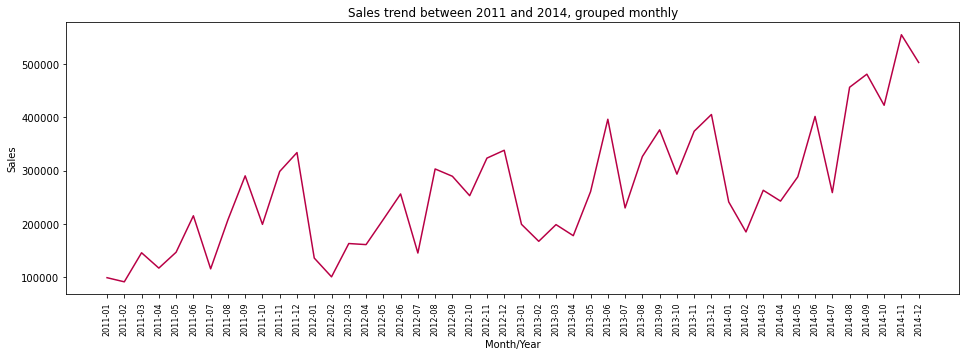

In [13]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.title('Sales trend between 2011 and 2014, grouped monthly')
plt.xlabel('Month/Year')
plt.ylabel('Sales')
plt.show()

### What are the top and bottom 10 selling products by revenue

In [14]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['sales'], inplace=True, ascending=False)

# Top 10 products by sales
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [15]:
# Bottom 10 products by sales
prod_sales[10:]

,sales
product_name,
"Samsung Smart Phone, VoIP",45406.3280
"Cisco Smart Phone, with Caller ID",43127.5008
"SAFCO Executive Leather Armchair, Black",41923.5300
"Cisco Smart Phone, Cordless",41021.5240
"Novimex Executive Leather Armchair, Adjustable",40585.1336
...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.7000
Grip Seal Envelopes,7.0720
Xerox 20,6.4800


### What are the top and bottom selling products by quantity 



In [16]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['quantity'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


In [17]:
# Least selling products
best_selling_prods[10:]

,quantity
product_name,
"Acco Index Tab, Clear",228
"Boston Pencil Sharpener, Water Color",217
"Tenex File Cart, Single Width",207
"Binney & Smith Pencil Sharpener, Water Color",207
"Sanford Pencil Sharpener, Easy-Erase",193
...,...
Penpower WorldCard Pro Card Scanner,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
Boston 1900 Electric Pencil Sharpener,1


### What shipping method is the most preferred



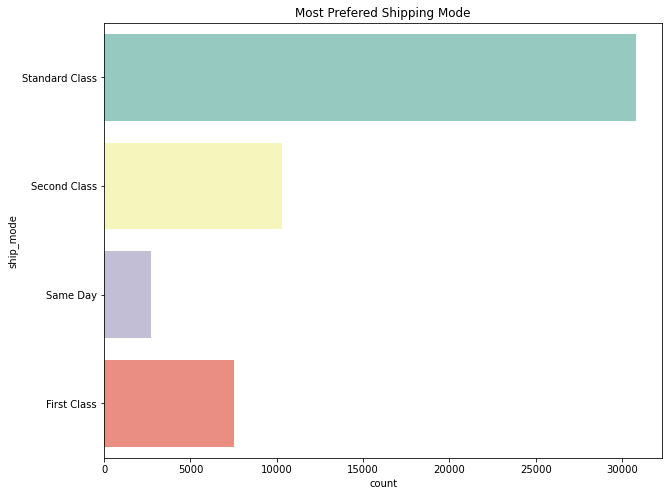

In [18]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(y ='ship_mode', data=df, palette="Set3").set(title = "Most Prefered Shipping Mode")

# Display the figure
plt.show()

### WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?


#### CATEGORY

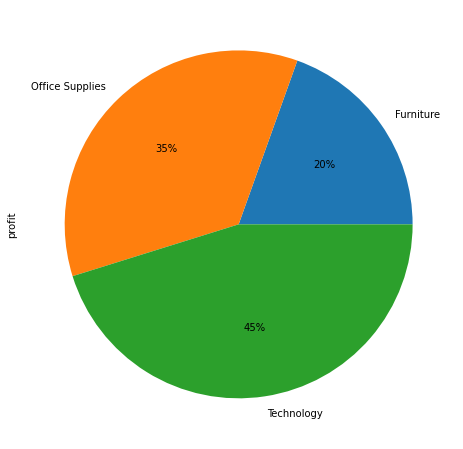

In [26]:
#Group categories together and plot in a pie chart to show which is the most profitable
pie_plot = df.groupby(['category']).sum().plot( kind = 'pie', y = 'profit', autopct='%1.0f%%',figsize=(8,8))
pie_plot.get_legend().remove()

#### SUB-CATEGORY

Text(0, 0.5, 'Profit')

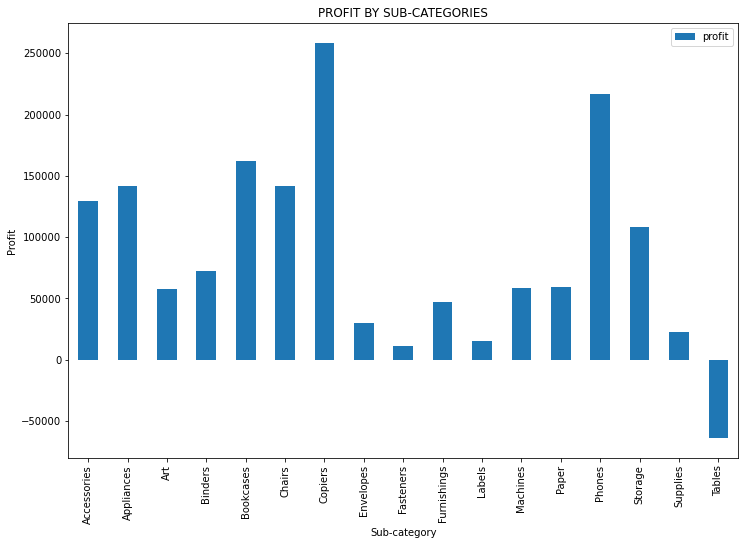

In [19]:
#Group sub-categories together to sho which are the profitable sub-categories
df.groupby(['sub_category']).sum().plot( kind = 'bar', y = 'profit', figsize=(12, 8))
plt.title('PROFIT BY SUB-CATEGORIES')
plt.xlabel('Sub-category')
plt.ylabel('Profit')

# KEY OBSERVATIONS

1. Sales has improved steadily between 2011 and 2014, there has been a few sharp drops that needs to be investigated, but asides that, the sales team is steadily growing.
2. The Company's best seller products are Smartphones; and this is by a fairly wide margin 

# RECOMMENDATION

1. Certain products have only sold 1 unit in the last 3 years,they need to be discontinued, and resources put into other products
2. The sales team needs to figure out how to execute, and market same day deliveries, as this may drive up orders products across board. 
3. The sale of tables needs to re-evaluated, where new marketing strategies are employed for at least a quarter, and if that doesn't work, it needs to be discontinued. It is dragging the profit of the furniture category backward.